# Importing nescessary libraries

In [15]:
import numpy as np 
import pandas as pd
#import plotly.express as px
import pickle

# Reading CSV file

In [16]:
data = pd.read_csv('bbyearend.csv')

## Loading the Model

In [17]:
file = pickle.load(open('model.pk1','rb'))
model = file['model']
features_list = file['features']

## Checking our test data

In [36]:
data.head()

,Unnamed: 0,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,7K3BhSpAxZBznislvUMVtn,Last Night,Morgan Wallen,0.492,0.675,6,-5.456,1,0.0389,...,0.1420,0.478,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4
1,1,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
2,2,3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,0.644,0.728,8,-5.750,1,0.0351,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
3,3,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,Taylor Swift,0.637,0.643,4,-6.571,1,0.0519,...,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
4,4,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.715,0.620,1,-6.005,0,0.0484,...,0.0822,0.172,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4


In [19]:
# checking if any missing values
print (data.isnull().values.any())

False


## Pre processing function

In [25]:
def preprocess(df):
    from sklearn.preprocessing import MinMaxScaler
    features = df[features_list]
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(features)
    features = pd.DataFrame(scaled_df, columns=features.columns)

    #centering
    center = lambda x: x - x.mean()
    features = features.apply(center)
    return features

In [37]:
features = preprocess(data)
features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-7.660539e-17,-9.381385e-17,2.442491e-17,1.276756e-16,3.552714e-17,-4.440892e-18,5.551115e-19,-2.775558e-18,9.658940e-17,-6.994405e-17,5.773160e-17
std,2.009923e-01,1.883528e-01,3.134570e-01,1.508804e-01,4.560480e-01,2.068589e-01,2.583641e-01,1.061138e-01,2.035442e-01,2.457460e-01,1.983715e-01
min,-5.692504e-01,-6.089038e-01,-4.636364e-01,-7.418885e-01,-7.100000e-01,-1.329877e-01,-2.652081e-01,-1.544178e-02,-2.405247e-01,-5.199890e-01,-4.380024e-01
25%,-1.456294e-01,-1.238368e-01,-2.818182e-01,-6.010059e-02,-7.100000e-01,-1.200280e-01,-2.109706e-01,-1.544178e-02,-1.328554e-01,-1.801431e-01,-1.501499e-01
50%,8.543140e-03,-3.685776e-03,-9.090909e-03,3.235878e-02,2.900000e-01,-8.652613e-02,-1.094711e-01,-1.544095e-02,-9.345560e-02,-3.753440e-03,-3.605808e-03
75%,1.535219e-01,1.364904e-01,2.636364e-01,8.821410e-02,2.900000e-01,-1.360723e-02,1.711667e-01,-1.542621e-02,1.136346e-01,1.789653e-01,1.265960e-01
max,4.307496e-01,3.910962e-01,5.363636e-01,2.581115e-01,2.900000e-01,8.670123e-01,7.347919e-01,9.845582e-01,7.594753e-01,4.800110e-01,5.619976e-01


In [38]:
idx = np.where(model.predict(features)==1)

In [39]:
idx[0]

array([ 5,  9, 11, 16, 24, 28, 30, 32, 34, 36, 39, 42, 52, 55, 56, 60, 64,
       68, 69, 71, 75, 78, 81, 84, 86, 87, 89, 91, 93, 94, 96, 97],
      dtype=int64)

In [43]:
data.iloc[idx[0],:][['track_name','first_artist']]

,track_name,first_artist
5,Calm Down (with Selena Gomez),Rema
9,I'm Good (Blue),David Guetta
11,You Proof,Morgan Wallen
16,Under The Influence,Chris Brown
24,All My Life (feat. J. Cole),Lil Durk
28,CUFF IT,Beyoncé
30,fukumean,Gunna
32,Players,Coi Leray
34,Dance The Night - From Barbie The Album,Dua Lipa
36,One Thing At A Time,Morgan Wallen


## Analyzing

In [34]:
# calculating percentage of songs that were energetic
len(idx[0],)/len(data)*100

32.0

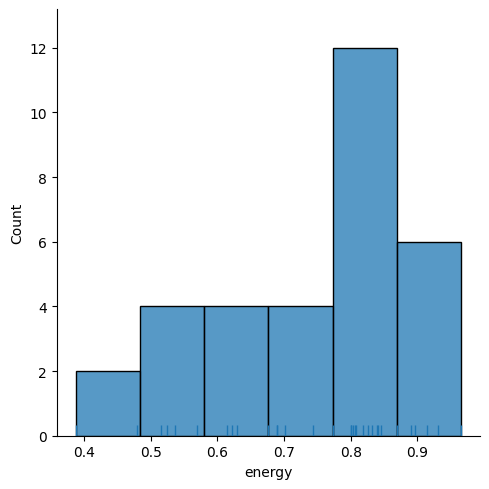

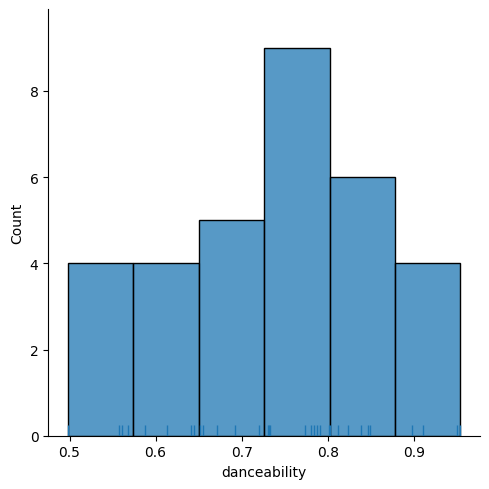

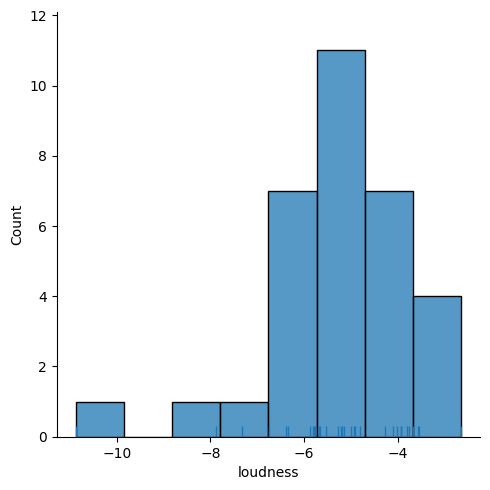

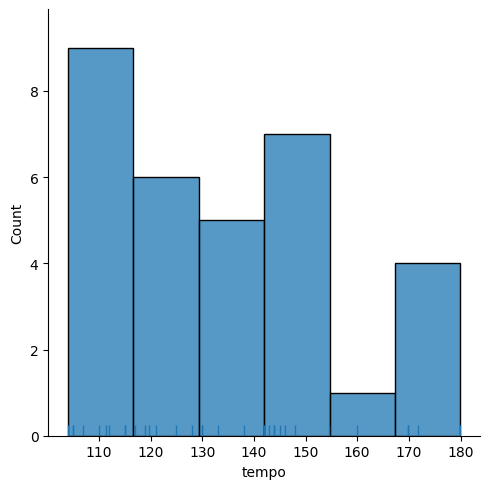

In [57]:
import seaborn as sns

energetic_songs = data.iloc[idx[0],:][features_list]

#distribution of energy levels of energetic songs
sns.displot(energetic_songs['energy'], rug = True);
sns.displot(energetic_songs['danceability'], rug = True);
sns.displot(energetic_songs['loudness'], rug = True);
sns.displot(energetic_songs['tempo'], rug = True);

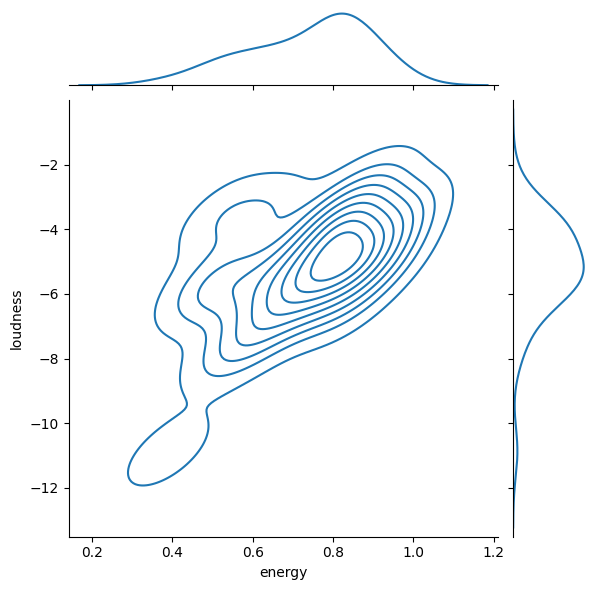

In [58]:
# exploring relations between energy and loudness
# Bivariate Distribution
sns.jointplot(x = "energy",
              y = "loudness",
              data = energetic_songs,
              kind = "kde");